<a href="https://colab.research.google.com/github/NourhanSowar/Spotify-Skip-Action-Prediction-Data-Science-Internship/blob/main/ML_ModeL_for_Skip_Action_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1- Data Loading

In [1]:
# Imporing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [198]:
session_track_data = pd.read_csv('/content/gdrive/MyDrive/Technocolabs/session_merged.csv')

In [199]:
session_track_data.head(3)

,Unnamed: 0,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,Unnamed: 0.1,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1275968.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018.0,0.989673,0.062072,0.654835,0.746795,0.879322,0.220889,0.726841,0.878262,1.031319e-07,0.636364,0.104322,0.825062,0.824766,1.0,0.134673,0.063012,0.520179,0.8,0.337156,0.207985,0.754802,0.784178,0.407795,0.335201,0.763936,0.230647,0.560879
2,2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1701710.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018.0,0.999998,0.355611,0.532180,0.548589,0.681213,0.157546,0.563019,0.881542,2.659045e-08,0.909091,0.135776,0.817156,0.774327,0.0,0.304339,0.046729,0.580142,0.8,0.373866,0.194634,0.760643,0.746381,0.404568,0.375268,0.761882,0.166574,0.570818


In [200]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(session_track_data, test_size = 0.2, random_state = 69)

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [201]:
train.shape, test.shape

((134304, 53), (33576, 53))

In [202]:
train.head(3)

,Unnamed: 0,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,Unnamed: 0.1,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,61343,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8,20,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,True,True,True,False,0,1,0,0,0,0,False,12,2018-07-15,True,user_collection,fwdbtn,fwdbtn,545853.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,258.426666,2017.0,0.997232,0.012217,0.570825,0.655993,0.721611,0.193224,0.423712,0.921398,0.012649,0.181818,0.453135,0.724798,0.593695,0.0,0.294608,0.399204,0.600071,0.8,0.228242,0.162244,0.707748,0.703478,0.495442,0.386595,0.690153,0.175546,0.556452
1,122681,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1,19,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,False,False,False,True,0,0,0,0,0,1,False,21,2018-07-14,True,catalog,trackdone,trackdone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12659,0_010adcab-c78b-4550-b970-a32a9e186e0a,4,17,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,clickrow,trackdone,745556.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,226.153824,2016.0,0.978442,0.025048,0.655576,0.684799,0.807368,0.188150,0.523299,0.872033,0.006978,0.363636,0.110103,0.790298,0.708333,0.0,0.212162,0.100134,0.520327,0.8,0.620430,0.229532,0.725659,0.731250,0.382114,0.369620,0.776285,0.170710,0.599849


In [203]:
test.head(3)

,Unnamed: 0,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,Unnamed: 0.1,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,132813,0_0ba0a6c1-634c-4bfb-afca-348c7af76369,11,20,t_9945581c-aae0-4314-b5fc-1a60ff7057fc,True,True,True,False,0,1,0,0,0,0,False,11,2018-07-15,True,radio,fwdbtn,fwdbtn,1221826.0,t_9945581c-aae0-4314-b5fc-1a60ff7057fc,213.863037,2016.0,0.999884,0.241319,0.577218,0.593199,0.744688,0.165926,0.571121,0.861315,1.425325e-09,0.636364,0.290736,0.813972,0.591398,1.0,0.343559,0.149733,0.476241,0.8,0.495131,0.174363,0.733698,0.763022,0.467209,0.371309,0.751506,0.255048,0.603891
1,146941,0_0cdc24ea-ada6-464e-8204-a19cd1b461ae,13,20,t_fd05d3ed-abfa-436c-8cf9-8898d20fab5e,True,True,True,False,0,1,0,0,0,0,True,12,2018-07-05,True,user_collection,fwdbtn,fwdbtn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84039,0_074f270e-b39e-475b-896e-6919123c6e6f,6,20,t_5dda6c94-0ed7-4133-b1ac-e4ed54d2f594,True,True,True,False,0,0,1,1,0,0,False,18,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134304 entries, 0 to 134303
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       134304 non-null  int64  
 1   session_id                       134304 non-null  object 
 2   session_position                 134304 non-null  int64  
 3   session_length                   134304 non-null  int64  
 4   track_id_clean                   134304 non-null  object 
 5   skip_1                           134304 non-null  bool   
 6   skip_2                           134304 non-null  bool   
 7   skip_3                           134304 non-null  bool   
 8   not_skipped                      134304 non-null  bool   
 9   context_switch                   134304 non-null  int64  
 10  no_pause_before_play             134304 non-null  int64  
 11  short_pause_before_play          134304 non-null  int64  
 12  lo

# 2- Data Wrangling

* Replacing boolean (True, False) by int32 (1, 0)




In [205]:

train.replace([True, False], [1, 0], inplace=True)

In [206]:
train.head()

,Unnamed: 0,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,Unnamed: 0.1,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,61343,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8,20,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,1,1,1,0,0,1,0,0,0,0,0,12,2018-07-15,1,user_collection,fwdbtn,fwdbtn,545853.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,258.426666,2017.0,0.997232,0.012217,0.570825,0.655993,0.721611,0.193224,0.423712,0.921398,1.264869e-02,0.181818,0.453135,0.724798,0.593695,0.0,0.294608,0.399204,0.600071,0.8,0.228242,0.162244,0.707748,0.703478,0.495442,0.386595,0.690153,0.175546,0.556452
1,122681,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1,19,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,0,0,0,1,0,0,0,0,0,1,0,21,2018-07-14,1,catalog,trackdone,trackdone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12659,0_010adcab-c78b-4550-b970-a32a9e186e0a,4,17,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,0,0,0,1,0,1,0,0,0,0,0,13,2018-07-15,1,catalog,clickrow,trackdone,745556.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,226.153824,2016.0,0.978442,0.025048,0.655576,0.684799,0.807368,0.188150,0.523299,0.872033,6.977915e-03,0.363636,0.110103,0.790298,0.708333,0.0,0.212162,0.100134,0.520327,0.8,0.620430,0.229532,0.725659,0.731250,0.382114,0.369620,0.776285,0.170710,0.599849
3,31731,0_02c690b2-fff2-447e-a51f-3fc1a89c672b,9,20,t_c2c86c28-6a6c-4cf0-942f-415955d0807b,0,0,0,1,0,1,0,0,0,0,0,22,2018-07-14,1,radio,trackdone,trackdone,1836937.0,t_c2c86c28-6a6c-4cf0-942f-415955d0807b,217.720001,2018.0,0.996458,0.317032,0.529726,0.565603,0.696702,0.164311,0.679106,0.858490,3.130192e-07,1.000000,0.068044,0.806096,0.517915,0.0,0.417652,0.067023,0.384008,0.8,0.789572,0.344557,0.818067,0.810912,0.287213,0.336100,0.856665,0.354329,0.524253
4,46211,0_03fc5fb1-b2fe-4d76-8f95-dbe9c5cb2d14,6,13,t_dd032f47-0360-4ce9-b7b5-ba76560a545f,0,1,1,0,0,1,0,0,0,0,0,23,2018-07-14,1,catalog,trackdone,endplay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* add new column skipped

In [207]:
train["skipped"] = train["skip_1"]*train["skip_2"]*train["skip_3"]
train.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

In [208]:
train.head(3)

,Unnamed: 0,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,Unnamed: 0.1,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x,skipped
0,61343,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8,20,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,0,1,0,0,0,0,0,12,2018-07-15,1,user_collection,fwdbtn,fwdbtn,545853.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,258.426666,2017.0,0.997232,0.012217,0.570825,0.655993,0.721611,0.193224,0.423712,0.921398,0.012649,0.181818,0.453135,0.724798,0.593695,0.0,0.294608,0.399204,0.600071,0.8,0.228242,0.162244,0.707748,0.703478,0.495442,0.386595,0.690153,0.175546,0.556452,1
1,122681,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1,19,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,0,0,0,0,0,1,0,21,2018-07-14,1,catalog,trackdone,trackdone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,12659,0_010adcab-c78b-4550-b970-a32a9e186e0a,4,17,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,0,1,0,0,0,0,0,13,2018-07-15,1,catalog,clickrow,trackdone,745556.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,226.153824,2016.0,0.978442,0.025048,0.655576,0.684799,0.807368,0.188150,0.523299,0.872033,0.006978,0.363636,0.110103,0.790298,0.708333,0.0,0.212162,0.100134,0.520327,0.8,0.620430,0.229532,0.725659,0.731250,0.382114,0.369620,0.776285,0.170710,0.599849,0


* chaning the date to weekday and droping the date column


In [209]:
train["date"] = pd.to_datetime(train["date"])
train['week_day'] = train["date"].dt.dayofweek
train.drop("date", inplace=True, axis=1)

In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134304 entries, 0 to 134303
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       134304 non-null  int64  
 1   session_id                       134304 non-null  object 
 2   session_position                 134304 non-null  int64  
 3   session_length                   134304 non-null  int64  
 4   track_id_clean                   134304 non-null  object 
 5   context_switch                   134304 non-null  int64  
 6   no_pause_before_play             134304 non-null  int64  
 7   short_pause_before_play          134304 non-null  int64  
 8   long_pause_before_play           134304 non-null  int64  
 9   hist_user_behavior_n_seekfwd     134304 non-null  int64  
 10  hist_user_behavior_n_seekback    134304 non-null  int64  
 11  hist_user_behavior_is_shuffle    134304 non-null  int64  
 12  ho

* Handling Categorical Data
 
 
---
One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder

Ordinal data --> data are in order --> LabelEncoder

---

In [211]:
# encoding categorical columns
categorical_columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']

for col in categorical_columns:
    # merging labels if they are less than threshold (< 0.001)
    counts = train[col].value_counts(normalize=True)
    labels_less_then_threshold = counts[counts < 0.001].index.to_list()
    where_to_replace = train[col].isin(labels_less_then_threshold).copy()
    train.loc[where_to_replace, col] = 'merged'
    print(labels_less_then_threshold)

[]
['playbtn', 'remote', 'trackerror', 'endplay']
['clickrow']


*  setting one hot encoding for categorical columns (Nominal Columns)

In [212]:

from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()

context_type = pd.DataFrame(One_Hot_Encoder.fit_transform(train[['context_type']]).toarray())
context_type.columns = One_Hot_Encoder.get_feature_names(['context_type'])

hist_user_behavior_reason_start = pd.DataFrame(One_Hot_Encoder.fit_transform(train[['hist_user_behavior_reason_start']]).toarray())
hist_user_behavior_reason_start.columns = One_Hot_Encoder.get_feature_names(['hub_reason_start']) # hub = hist_user_behavior

hist_user_behavior_reason_end = pd.DataFrame(One_Hot_Encoder.fit_transform(train[['hist_user_behavior_reason_end']]).toarray())
hist_user_behavior_reason_end.columns = One_Hot_Encoder.get_feature_names(['hub_reason_end'])  # hub = hist_user_behavior

In [213]:
context_type.head()

,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [214]:
hist_user_behavior_reason_start.head()

,hub_reason_start_appload,hub_reason_start_backbtn,hub_reason_start_clickrow,hub_reason_start_fwdbtn,hub_reason_start_merged,hub_reason_start_trackdone
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [215]:
hist_user_behavior_reason_end.head()

,hub_reason_end_backbtn,hub_reason_end_endplay,hub_reason_end_fwdbtn,hub_reason_end_logout,hub_reason_end_merged,hub_reason_end_remote,hub_reason_end_trackdone
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


* Concatenate in one dataframe

In [216]:
train = pd.concat([train, context_type, hist_user_behavior_reason_start, hist_user_behavior_reason_end], axis = 1)

In [217]:
train.drop(["context_type", "hist_user_behavior_reason_start", "hist_user_behavior_reason_end"],
                        axis = 1, inplace = True)
train.head()

,Unnamed: 0,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,Unnamed: 0.1,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x,skipped,week_day,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hub_reason_start_appload,hub_reason_start_backbtn,hub_reason_start_clickrow,hub_reason_start_fwdbtn,hub_reason_start_merged,hub_reason_start_trackdone,hub_reason_end_backbtn,hub_reason_end_endplay,hub_reason_end_fwdbtn,hub_reason_end_logout,hub_reason_end_merged,hub_reason_end_remote,hub_reason_end_trackdone
0,61343,0_053ec7fb-dc2e-4cb8-9f2c-8f6407e27785,8,20,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,0,1,0,0,0,0,0,12,1,545853.0,t_05b19d9f-5ac1-4616-a45a-c38610eecad7,258.426666,2017.0,0.997232,0.012217,0.570825,0.655993,0.721611,0.193224,0.423712,0.921398,1.264869e-02,0.181818,0.453135,0.724798,0.593695,0.0,0.294608,0.399204,0.600071,0.8,0.228242,0.162244,0.707748,0.703478,0.495442,0.386595,0.690153,0.175546,0.556452,1,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,122681,0_0ac1d286-5abe-4c5e-9ccb-2b9c20cd3cfe,1,19,t_6d1b9747-6bb2-4d8d-a3b9-7e9ed3a35197,0,0,0,0,0,1,0,21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12659,0_010adcab-c78b-4550-b970-a32a9e186e0a,4,17,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,0,1,0,0,0,0,0,13,1,745556.0,t_2dcb53fc-a82a-4255-be6e-8c4642f6aeaf,226.153824,2016.0,0.978442,0.025048,0.655576,0.684799,0.807368,0.188150,0.523299,0.872033,6.977915e-03,0.363636,0.110103,0.790298,0.708333,0.0,0.212162,0.100134,0.520327,0.8,0.620430,0.229532,0.725659,0.731250,0.382114,0.369620,0.776285,0.170710,0.599849,0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31731,0_02c690b2-fff2-447e-a51f-3fc1a89c672b,9,20,t_c2c86c28-6a6c-4cf0-942f-415955d0807b,0,1,0,0,0,0,0,22,1,1836937.0,t_c2c86c28-6a6c-4cf0-942f-415955d0807b,217.720001,2018.0,0.996458,0.317032,0.529726,0.565603,0.696702,0.164311,0.679106,0.858490,3.130192e-07,1.000000,0.068044,0.806096,0.517915,0.0,0.417652,0.067023,0.384008,0.8,0.789572,0.344557,0.818067,0.810912,0.287213,0.336100,0.856665,0.354329,0.524253,0,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,46211,0_03fc5fb1-b2fe-4d76-8f95-dbe9c5cb2d14,6,13,t_dd032f47-0360-4ce9-b7b5-ba76560a545f,0,1,0,0,0,0,0,23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


* Dropping 'track_id', 'tack_id_clean' column.

In [218]:

train.drop(["track_id_clean"], axis=1, inplace=True)
train.drop(["track_id"], axis=1, inplace=True)

*  setting index

In [219]:
train['session_position'] = train['session_position'].astype(int) 
train["track_index"] = train["session_position"]
train.set_index(["session_id", "track_index"], inplace=True)
train.sort_index(inplace=True)

In [220]:
train.tail()

Unnamed: 0  \
session_id                             track_index               
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16               167875   
                                       17               167876   
                                       18               167877   
                                       19               167878   
                                       20               167879   

                                                    session_position  \
session_id                             track_index                     
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                         16   
                                       17                         17   
                                       18                         18   
                                       19                         19   
                                       20                         20   

                                                    session_length  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                       20   
                                       17                       20   
                                       18                       20   
                                       19                       20   
                                       20                       20   

                                                    context_switch  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                        0   
                                       17                        0   
                                       18                        0   
                                       19                        0   
                                       20                        0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                              1   
                                       17                              1   
                                       18                              1   
                                       19                              1   
                                       20                              1   

                                                    short_pause_before_play  \
session_id                             track_index                            
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                                 0   
                                       17                                 0   
                                       18                                 0   
                                       19                                 0   
                                       20                                 0   

                                                    long_pause_before_play  \
session_id                             track_index                           
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                                0   
                                       17                                0   
                                       18                                0   
                                       19                                0   
                                       20                                0   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 16                                      0   
                                       17                                      0   
                                       18                                      0   
                                       19       

In [221]:
missing_val_count_by_column = (train.isnull().sum())
missing_val_count_by_column

Unnamed: 0                                0
session_position                          0
session_length                            0
context_switch                            0
no_pause_before_play                      0
short_pause_before_play                   0
long_pause_before_play                    0
hist_user_behavior_n_seekfwd              0
hist_user_behavior_n_seekback             0
hist_user_behavior_is_shuffle             0
hour_of_day                               0
premium                                   0
Unnamed: 0.1                          68712
duration_x                            68712
release_year_x                        68712
us_popularity_estimate_x              68712
acousticness_x                        68712
beat_strength_x                       68712
bounciness_x                          68712
danceability_x                        68712
dyn_range_mean_x                      68712
energy_x                              68712
flatness_x                      

*  replacing Null values with 0

In [222]:
train = train.fillna(method= 'bfill', axis=0).fillna(0)


In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 134304 entries, ('0_00006f66-33e5-4de7-a324-2d18e439fc1e', 1) to ('0_0eaeef5d-25e9-4429-bd55-af15d3604c9f', 20)
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          134304 non-null  int64  
 1   session_position                    134304 non-null  int64  
 2   session_length                      134304 non-null  int64  
 3   context_switch                      134304 non-null  int64  
 4   no_pause_before_play                134304 non-null  int64  
 5   short_pause_before_play             134304 non-null  int64  
 6   long_pause_before_play              134304 non-null  int64  
 7   hist_user_behavior_n_seekfwd        134304 non-null  int64  
 8   hist_user_behavior_n_seekback       134304 non-null  int64  
 9   hist_user_behavior_is_shuffle       134304 non-null  int64  
 10  hour_of_

In [224]:
train.head()

Unnamed: 0  \
session_id                             track_index               
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                     0   
                                       2                     1   
                                       3                     2   
                                       4                     3   
                                       5                     4   

                                                    session_position  \
session_id                             track_index                     
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                           1   
                                       2                           2   
                                       3                           3   
                                       4                           4   
                                       5                           5   

                                                    session_length  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                        20   
                                       2                        20   
                                       3                        20   
                                       4                        20   
                                       5                        20   

                                                    context_switch  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                         0   
                                       2                         0   
                                       3                         0   
                                       4                         0   
                                       5                         0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               0   
                                       2                               1   
                                       3                               1   
                                       4                               1   
                                       5                               1   

                                                    short_pause_before_play  \
session_id                             track_index                            
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                  0   
                                       2                                  0   
                                       3                                  0   
                                       4                                  0   
                                       5                                  0   

                                                    long_pause_before_play  \
session_id                             track_index                           
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                 0   
                                       2                                 0   
                                       3                                 0   
                                       4                                 0   
                                       5                                 0   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                       0   
                                       2                                       0   
                                       3                                       0   
                                       4        

# 3- EDA - Exploratory Data Analysis

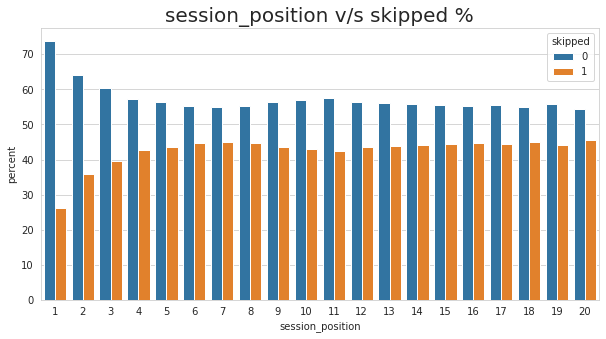

In [225]:
x,y = 'session_position', 'skipped'
plt.figure(figsize=(10, 5))

data=(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index())

sns.barplot(x=x, y='percent',hue=y, data=data)
plt.title(x+' v/s '+y+' %', size=20)
plt.show()

Text(0.5, 1.0, 'session_length v/s skipped %')

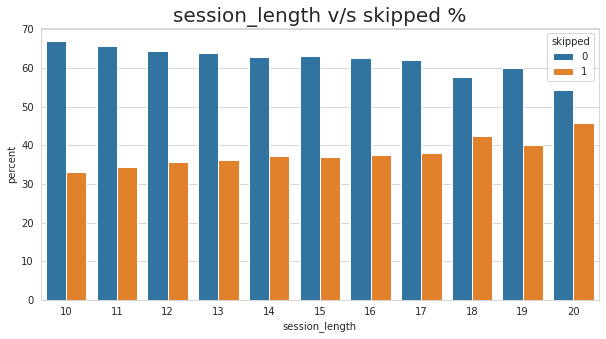

In [226]:
x,y = 'session_length', 'skipped'
plt.figure(figsize=(10, 5))

data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()  )

sns.barplot(x=x, y='percent',hue=y, data=data)
plt.title(x+' v/s '+y+' %', size=20)

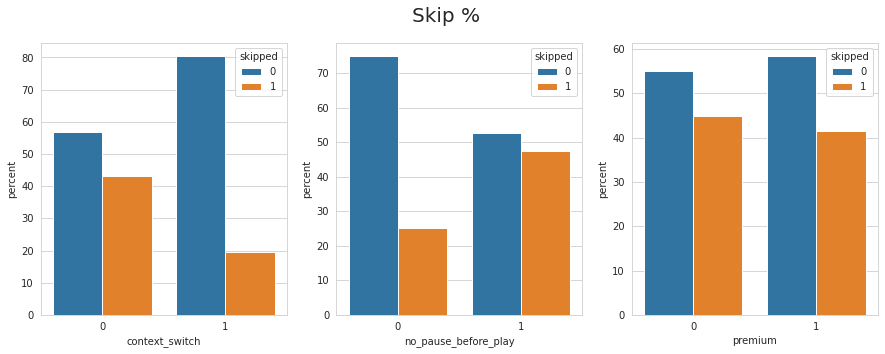

In [227]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.suptitle('Skip %', fontsize = 20)

x,y = 'context_switch', 'skipped'
data=(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()  )
sns.barplot(ax=axes[0], x=x, y='percent',hue=y, data=data)

x,y = 'no_pause_before_play', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()  )
sns.barplot(ax=axes[1], x=x, y='percent',hue=y, data=data)

x,y = 'premium', 'skipped'
data=(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()  )
sns.barplot(ax=axes[2], x=x, y='percent',hue=y, data=data)

plt.show()

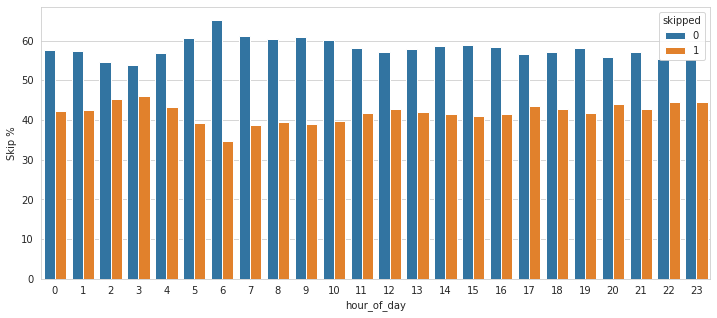

In [228]:
plt.figure(figsize=(12,5))
x,y = 'hour_of_day', 'skipped'
data=(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Skip %')
.reset_index()  )
sns.barplot(x=x, y='Skip %',hue=y, data=data)

plt.show()

# 4- Featuring Engineering

* Checking the correlation amoung variables

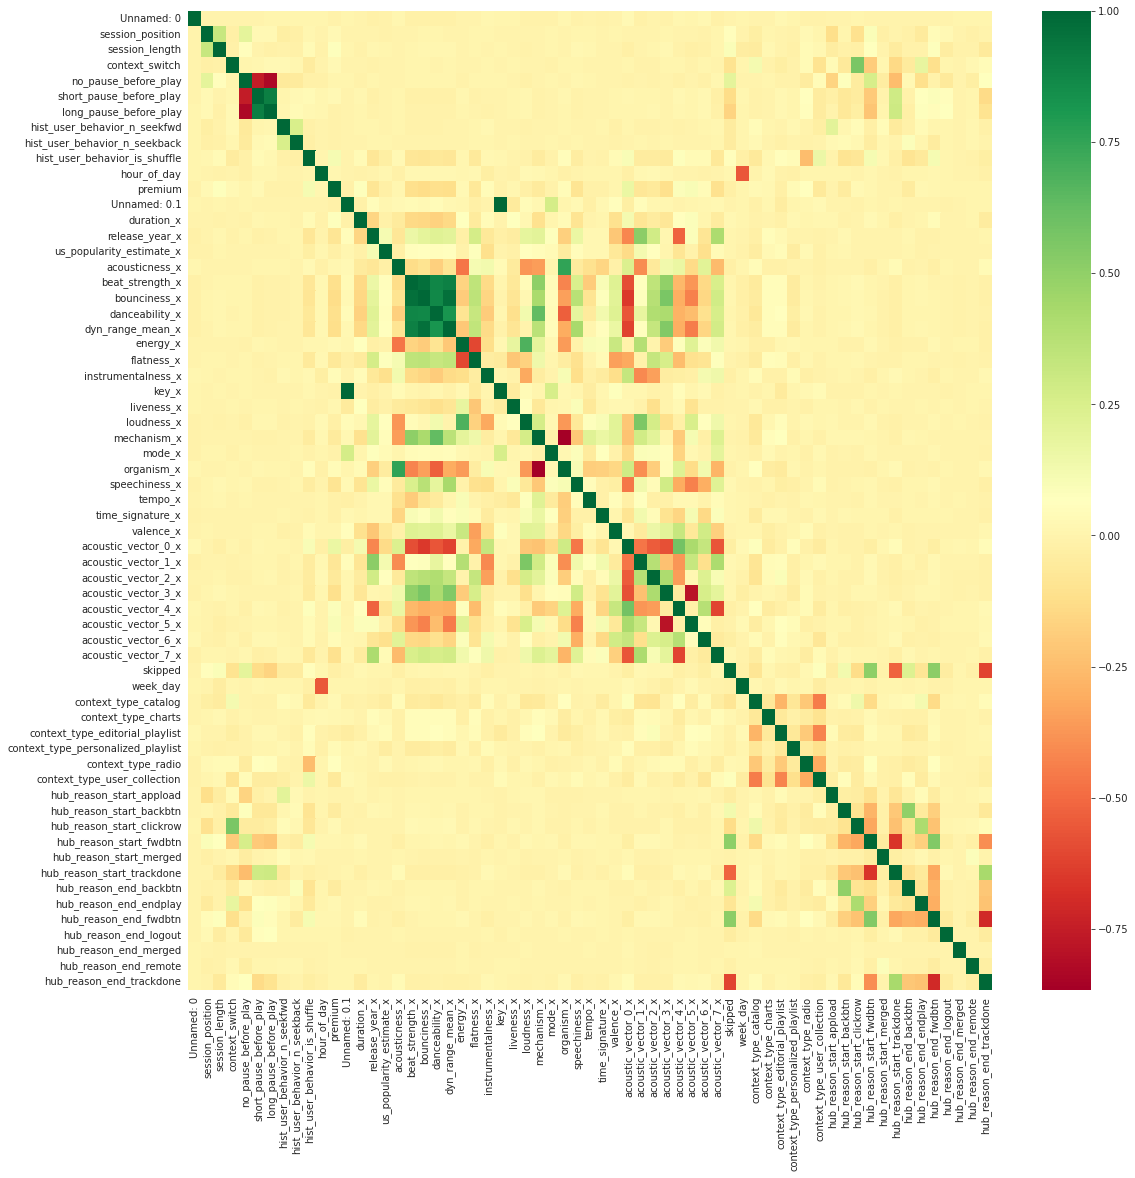

In [229]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), cmap = "RdYlGn")
plt.show()

In above heatmap, there are **2 dark boxes** along the diagonal.<br>
These box represents few variables/features are highly correlated with each other, so we will drop all highly correlated variables except one which is having high correlation with target variable ('skipped').

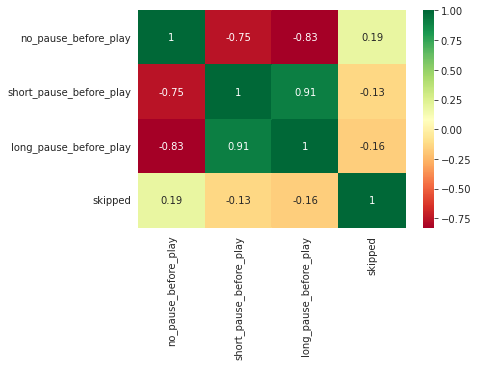

In [166]:
sns.heatmap(train[['no_pause_before_play', 'short_pause_before_play', 
                               'long_pause_before_play', 'skipped']].corr(),annot = True, cmap = "RdYlGn")
plt.show()

In [230]:
train.drop(["short_pause_before_play", "long_pause_before_play"], axis=1, inplace=True)

In [231]:
train.tail(3)

Unnamed: 0  \
session_id                             track_index               
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18               167877   
                                       19               167878   
                                       20               167879   

                                                    session_position  \
session_id                             track_index                     
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                         18   
                                       19                         19   
                                       20                         20   

                                                    session_length  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                       20   
                                       19                       20   
                                       20                       20   

                                                    context_switch  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                        0   
                                       19                        0   
                                       20                        0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                              1   
                                       19                              1   
                                       20                              1   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                                      0   
                                       19                                      0   
                                       20                                      0   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                                       0   
                                       19                                       0   
                                       20                                       0   

                                                    hist_user_behavior_is_shuffle  \
session_id                             track_index                                  
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                                       0   
                                       19                                       0   
                                       20                                       0   

                                                    hour_of_day  premium  \
session_id                             track_index                         
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                    13        1   
                                       19                    13        1   
                                       20                    13        1   

                                                    Unnamed: 0.1  duration_x  \
session_id                             track_index                             
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18               788065.0  193.773331   
                                       19               788065.0  193.773331   
                                       20               364179.0  216.853333   

                                                    release_year_x  \
session_id                             track_index                   
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f 18                   2018.0   
            

*  Scaling

In [232]:
scaling_columns = []
for col in train.columns:
    if (len(train[col].unique()) != 2) :
        scaling_columns.append(col)
print(len(scaling_columns),scaling_columns)

36 ['Unnamed: 0', 'session_position', 'session_length', 'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback', 'hour_of_day', 'Unnamed: 0.1', 'duration_x', 'release_year_x', 'us_popularity_estimate_x', 'acousticness_x', 'beat_strength_x', 'bounciness_x', 'danceability_x', 'dyn_range_mean_x', 'energy_x', 'flatness_x', 'instrumentalness_x', 'key_x', 'liveness_x', 'loudness_x', 'mechanism_x', 'organism_x', 'speechiness_x', 'tempo_x', 'time_signature_x', 'valence_x', 'acoustic_vector_0_x', 'acoustic_vector_1_x', 'acoustic_vector_2_x', 'acoustic_vector_3_x', 'acoustic_vector_4_x', 'acoustic_vector_5_x', 'acoustic_vector_6_x', 'acoustic_vector_7_x', 'week_day']


In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in scaling_columns:
    train[col] = scaler.fit_transform(np.array(train[col]).reshape(-1, 1))

In [234]:
train.head(5)

Unnamed: 0  \
session_id                             track_index               
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1             -1.730717   
                                       2             -1.730697   
                                       3             -1.730676   
                                       4             -1.730655   
                                       5             -1.730635   

                                                    session_position  \
session_id                             track_index                     
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                   -1.525891   
                                       2                   -1.342715   
                                       3                   -1.159538   
                                       4                   -0.976361   
                                       5                   -0.793185   

                                                    session_length  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                  0.687363   
                                       2                  0.687363   
                                       3                  0.687363   
                                       4                  0.687363   
                                       5                  0.687363   

                                                    context_switch  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                         0   
                                       2                         0   
                                       3                         0   
                                       4                         0   
                                       5                         0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               0   
                                       2                               1   
                                       3                               1   
                                       4                               1   
                                       5                               1   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               -0.102245   
                                       2                               -0.102245   
                                       3                               -0.102245   
                                       4                               -0.102245   
                                       5                               -0.102245   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                -0.072103   
                                       2                                -0.072103   
                                       3                                -0.072103   
                                       4                                -0.072103   
                                       5                                -0.072103   

                                                    hist_user_behavior_is_shuffle  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                        1   
                                       2                                        1   
                                       3    

* Important feature using ExtraTreesRegressor

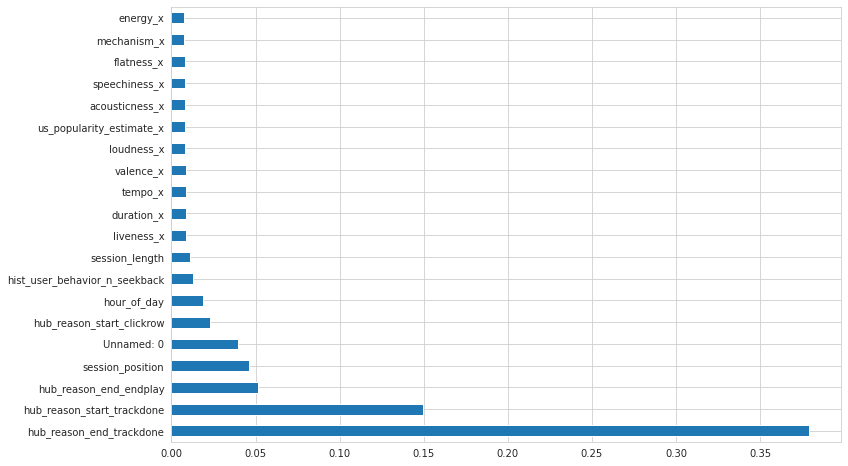

In [235]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()

x_train = train.drop("skipped", axis=1)
y_train = train['skipped']

selection.fit(x_train, y_train)

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

* web_app_scaling_df

Making dataset for Web Application (web_app_scaling_df) and then manually uploading it on cloud for future use in web application.

Why this dataset?
This dataset will be used for scaling of data received through web app form. 
data received through web app form will be merged (as a last row) with this dataframe (web_app_scaling_df), then this merged dataframe will be scaled & then last row of dataframe is separately feed into ML model for prediction.

In [236]:
web_app_scaling_df = test.copy()

# Replacing boolean (True, False) by int32 (1, 0)
web_app_scaling_df.replace([True, False], [1, 0], inplace=True)

# adding new skipped column and dropping skip_1, skip_2 and skip_3
web_app_scaling_df["skipped"] = web_app_scaling_df["skip_1"]*web_app_scaling_df["skip_2"]*web_app_scaling_df["skip_3"]
web_app_scaling_df.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

# chaning the date to weekday and droping the date column
web_app_scaling_df["date"] = pd.to_datetime(web_app_scaling_df["date"])
web_app_scaling_df['week_day'] = web_app_scaling_df["date"].dt.dayofweek
web_app_scaling_df.drop("date", inplace=True, axis=1)

web_app_scaling_df=web_app_scaling_df.fillna(method= 'bfill', axis=0).fillna(0)

# encoding categorical columns
categorical_columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']

for col in categorical_columns:
    # merging labels if they are less than threshold (< 0.001)
    counts = web_app_scaling_df[col].value_counts(normalize=True)
    labels_less_then_threshold = counts[counts < 0.001].index.to_list()
    where_to_replace = web_app_scaling_df[col].isin(labels_less_then_threshold).copy()
    web_app_scaling_df.loc[where_to_replace, col] = 'merged'

# setting one hot encoding for categorical columns (Nominal Columns)
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()
context_type = pd.DataFrame(One_Hot_Encoder.fit_transform(web_app_scaling_df[['context_type']]).toarray())
context_type.columns = One_Hot_Encoder.get_feature_names(['context_type'])
hist_user_behavior_reason_start = pd.DataFrame(One_Hot_Encoder.fit_transform(web_app_scaling_df[['hist_user_behavior_reason_start']]).toarray())
hist_user_behavior_reason_start.columns = One_Hot_Encoder.get_feature_names(['hub_reason_start']) # hub = hist_user_behavior
hist_user_behavior_reason_end = pd.DataFrame(One_Hot_Encoder.fit_transform(web_app_scaling_df[['hist_user_behavior_reason_end']]).toarray())
hist_user_behavior_reason_end.columns = One_Hot_Encoder.get_feature_names(['hub_reason_end'])  # hub = hist_user_behavior

# Concatenate dataframe --> session_track_data + context_type + hist_user_behavior_reason_start + hist_user_behavior_reason_end
web_app_scaling_df = pd.concat([web_app_scaling_df, context_type, hist_user_behavior_reason_start, hist_user_behavior_reason_end], axis = 1)
web_app_scaling_df.drop(["context_type", "hist_user_behavior_reason_start", "hist_user_behavior_reason_end", "track_id","track_id_clean"],
                        axis = 1, inplace = True)

# drop all highly correlated variables.
web_app_scaling_df.drop(["short_pause_before_play", "long_pause_before_play"], axis=1, inplace=True)

web_app_scaling_df.drop(["session_id"], axis=1, inplace=True)
web_app_scaling_df.drop("skipped", axis=1, inplace=True)
web_app_scaling_df.drop(['hub_reason_start_playbtn'], axis=1, inplace=True)
#web_app_scaling_df = web_app_scaling_df[x_train.columns.tolist()]

In [237]:
web_app_scaling_df.head()

,Unnamed: 0,session_position,session_length,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,Unnamed: 0.1,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x,week_day,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hub_reason_start_appload,hub_reason_start_backbtn,hub_reason_start_clickrow,hub_reason_start_fwdbtn,hub_reason_start_merged,hub_reason_start_trackdone,hub_reason_end_backbtn,hub_reason_end_endplay,hub_reason_end_fwdbtn,hub_reason_end_logout,hub_reason_end_merged,hub_reason_end_remote,hub_reason_end_trackdone
0,132813,11,20,0,1,0,0,0,11,1,1221826.0,213.863037,2016.0,0.999884,0.241319,0.577218,0.593199,0.744688,0.165926,0.571121,0.861315,1.425325e-09,0.636364,0.290736,0.813972,0.591398,1.0,0.343559,0.149733,0.476241,0.8,0.495131,0.174363,0.733698,0.763022,0.467209,0.371309,0.751506,0.255048,0.603891,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,146941,13,20,0,1,0,0,1,12,1,794377.0,220.399994,1965.0,0.999251,0.011498,0.538453,0.494264,0.654131,0.136046,0.730071,0.804417,1.032965e-05,0.454545,0.075368,0.745183,0.516616,0.0,0.350439,0.044271,0.434843,0.8,0.894014,0.600175,0.575822,0.518151,0.304470,0.821440,0.785688,0.253103,0.410980,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,84039,6,20,0,0,0,0,0,18,1,794377.0,220.399994,1965.0,0.999251,0.011498,0.538453,0.494264,0.654131,0.136046,0.730071,0.804417,1.032965e-05,0.454545,0.075368,0.745183,0.516616,0.0,0.350439,0.044271,0.434843,0.8,0.894014,0.600175,0.575822,0.518151,0.304470,0.821440,0.785688,0.253103,0.410980,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,152017,11,11,0,1,0,0,0,9,1,794377.0,220.399994,1965.0,0.999251,0.011498,0.538453,0.494264,0.654131,0.136046,0.730071,0.804417,1.032965e-05,0.454545,0.075368,0.745183,0.516616,0.0,0.350439,0.044271,0.434843,0.8,0.894014,0.600175,0.575822,0.518151,0.304470,0.821440,0.785688,0.253103,0.410980,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,127862,17,20,0,1,0,0,1,14,1,1226460.0,176.746674,2017.0,0.999182,0.521873,0.473396,0.578491,0.739905,0.178725,0.677496,0.861491,1.358052e-08,0.636364,0.133498,0.828050,0.510638,0.0,0.517355,0.084864,0.508294,0.8,0.882096,0.254737,0.735387,0.828825,0.445317,0.442902,0.858271,0.414416,0.546916,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [238]:
print('x_train Shape: ', x_train.shape)
print('web_app_scaling_df Shape: ', web_app_scaling_df.shape)

x_train Shape:  (134304, 60)
web_app_scaling_df Shape:  (33576, 60)


In [239]:
web_app_scaling_df.to_csv('web_app_scaling_df.csv')

*  Preprocessing of Testing Dataset

In [240]:
### Preprocessing Testing Data seperately to avoid DATA LEAKAGE.
# Replacing boolean (True, False) by int32 (1, 0)
test.replace([True, False], [1, 0], inplace=True)

# adding new skipped column and dropping skip_1, skip_2 and skip_3
test["skipped"] = test["skip_1"]*test["skip_2"]*test["skip_3"]
test.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

# chaning the date to weekday and droping the date column
test["date"] = pd.to_datetime(test["date"])
test['week_day'] = test["date"].dt.dayofweek
test.drop("date", inplace=True, axis=1)
test = test.fillna(method= 'bfill', axis=0).fillna(0)

# encoding categorical columns
categorical_columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']

for col in categorical_columns:
    # merging labels if they are less than threshold (< 0.001)
    counts = test[col].value_counts(normalize=True)
    labels_less_then_threshold = counts[counts < 0.001].index.to_list()
    where_to_replace = test[col].isin(labels_less_then_threshold).copy()
    test.loc[where_to_replace, col] = 'merged'

# setting one hot encoding for categorical columns (Nominal Columns)
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()
context_type = pd.DataFrame(One_Hot_Encoder.fit_transform(test[['context_type']]).toarray())
context_type.columns = One_Hot_Encoder.get_feature_names(['context_type'])
hist_user_behavior_reason_start = pd.DataFrame(One_Hot_Encoder.fit_transform(test[['hist_user_behavior_reason_start']]).toarray())
hist_user_behavior_reason_start.columns = One_Hot_Encoder.get_feature_names(['hub_reason_start']) # hub = hist_user_behavior
hist_user_behavior_reason_end = pd.DataFrame(One_Hot_Encoder.fit_transform(test[['hist_user_behavior_reason_end']]).toarray())
hist_user_behavior_reason_end.columns = One_Hot_Encoder.get_feature_names(['hub_reason_end'])  # hub = hist_user_behavior

# Concatenate dataframe --> session_track_data + context_type + hist_user_behavior_reason_start + hist_user_behavior_reason_end
test = pd.concat([test, context_type, hist_user_behavior_reason_start, hist_user_behavior_reason_end], axis = 1)
test.drop(["context_type", "hist_user_behavior_reason_start", "hist_user_behavior_reason_end", "track_id","track_id_clean"],
                        axis = 1, inplace = True)

# setting index
test['session_position'] = test['session_position'].astype(int) 
test["track_index"] = test["session_position"]
test.set_index(["session_id", "track_index"], inplace=True)
test.sort_index(inplace=True)

# drop all highly correlated variables.
test.drop(["short_pause_before_play", "long_pause_before_play"], axis=1, inplace=True)

# Scaling
scaling_columns = []
for col in test.columns:
    if (len(test[col].unique()) != 2) :
        scaling_columns.append(col)
for col in scaling_columns:
    test[col] = scaler.fit_transform(np.array(test[col]).reshape(-1, 1))

x_test = test.drop("skipped", axis=1)
y_test = test['skipped']

In [241]:
print('x_train Shape: ', x_train.shape)  
print('x_test Shape: ', x_test.shape)

x_train Shape:  (134304, 60)
x_test Shape:  (33576, 61)


In [242]:
# Columns which are in x_train but not in x_test, due to OneHotEncoding.
x_train_columns = x_train.columns.tolist()
x_test_columns = x_test.columns.tolist()

for col_name in x_train_columns:
    if (col_name not in x_test_columns):
        print(col_name)

In [243]:
# Columns which are in x_test but not in x_train, due to OneHotEncoding.
for col_name in x_test_columns:
    if (col_name not in x_train_columns):
        print(col_name)

hub_reason_start_playbtn


In [244]:
test[['hub_reason_start_playbtn', 'skipped']].corr()

,hub_reason_start_playbtn,skipped
hub_reason_start_playbtn,1.000000,-0.005484
skipped,-0.005484,1.000000


In [245]:
x_test.drop(['hub_reason_start_playbtn'], axis=1, inplace=True)

In [246]:
print('x_train Shape: ', x_train.shape) 
print('x_test Shape: ', x_test.shape)

x_train Shape:  (134304, 60)
x_test Shape:  (33576, 60)


In [247]:
# arranging x_test columns in sequence of x_train columns.
x_test = x_test[x_train_columns]
x_test.head()

Unnamed: 0  \
session_id                             track_index               
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15            -1.737071   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3             -1.736906   
                                       4             -1.736885   
                                       7             -1.736823   
                                       10            -1.736761   

                                                    session_position  \
session_id                             track_index                     
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                   1.044001   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                   -1.157337   
                                       4                   -0.973892   
                                       7                   -0.423558   
                                       10                   0.126777   

                                                    session_length  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                 0.681543   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                  0.681543   
                                       4                  0.681543   
                                       7                  0.681543   
                                       10                 0.681543   

                                                    context_switch  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                        0   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                         0   
                                       4                         0   
                                       7                         0   
                                       10                        0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                              1   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                               1   
                                       4                               1   
                                       7                               1   
                                       10                              1   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                              -0.122198   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                               -0.122198   
                                       4                               -0.122198   
                                       7                               -0.122198   
                                       10                              -0.122198   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                               -0.104834   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                                -0.104834   
                                       4                                -0.104834   
                                       7                                -0.104834   
                                       10                               -0.104834   

                                                    hist_user_behavior_is_shuffle  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 15                                       1   
0_0000a72b-09ac-412f-b452-9b9e79bded8f 3                                        1   
                                       4    

In [248]:
# Columns which are in x_test but not in x_train, due to OneHotEncoding.
x_train_columns = x_train.columns.tolist()
x_test_columns = x_test.columns.tolist()
for col_name in x_test_columns:
    if (col_name not in x_train_columns):
        print(col_name)

# 5-  ML Model(s) training & selecting best Model based on f1_score.

* Import libraries and models

In [249]:
from sklearn.ensemble import RandomForestClassifier
! pip install xgboost
from xgboost import XGBClassifier
! pip install lightgbm
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

In [250]:
x_train.head()

Unnamed: 0  \
session_id                             track_index               
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1             -1.730717   
                                       2             -1.730697   
                                       3             -1.730676   
                                       4             -1.730655   
                                       5             -1.730635   

                                                    session_position  \
session_id                             track_index                     
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                   -1.525891   
                                       2                   -1.342715   
                                       3                   -1.159538   
                                       4                   -0.976361   
                                       5                   -0.793185   

                                                    session_length  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                  0.687363   
                                       2                  0.687363   
                                       3                  0.687363   
                                       4                  0.687363   
                                       5                  0.687363   

                                                    context_switch  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                         0   
                                       2                         0   
                                       3                         0   
                                       4                         0   
                                       5                         0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               0   
                                       2                               1   
                                       3                               1   
                                       4                               1   
                                       5                               1   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               -0.102245   
                                       2                               -0.102245   
                                       3                               -0.102245   
                                       4                               -0.102245   
                                       5                               -0.102245   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                -0.072103   
                                       2                                -0.072103   
                                       3                                -0.072103   
                                       4                                -0.072103   
                                       5                                -0.072103   

                                                    hist_user_behavior_is_shuffle  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                        1   
                                       2                                        1   
                                       3    

* RandomForestClassifier

In [251]:
# RandomForestClassifier
RFC = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
pred_RFC = RFC.predict(x_test)
score_RFC = f1_score(y_test, pred_RFC)
print('RandomForestClassifier: ',score_RFC)

RandomForestClassifier:  0.8602471535684532


* XGBClassifier

In [252]:
# XGBClassifier
XGBC = XGBClassifier(random_state = 1).fit(x_train, y_train)
pred_XGBC = XGBC.predict(x_test)
score_XGBC = f1_score(y_test, pred_XGBC)
print('XGBClassifier: ',score_XGBC)

XGBClassifier:  0.8584317641792073


*  DecisionTreeClassifier

In [253]:
depth = []
score_DTC = [] 
for i in range(1,21):
    DTC = DecisionTreeClassifier(criterion="entropy", max_depth = i, random_state = 1).fit(x_train, y_train)
    pred_DTC = DTC.predict(x_test) 
    score = f1_score(y_test, pred_DTC)
    depth.append(i)
    score_DTC.append(score)
    
print('We get maximum f1_score {} for DecisionTreeClassifier when max_depth = {}.'.format
      (max(score_DTC), depth[score_DTC.index(max(score_DTC))])  )

We get maximum f1_score 0.8648262732032365 for DecisionTreeClassifier when max_depth = 9.


In [254]:
DTC = DecisionTreeClassifier(criterion="entropy", max_depth = 10, random_state = 1).fit(x_train, y_train)
pred_DTC = DTC.predict(x_test)
score_DTC = f1_score(y_test, pred_DTC)
print('DecisionTreeClassifier: ',score_DTC)

DecisionTreeClassifier:  0.8621591333582368


* LogisticRegression

In [255]:
# LogisticRegression
LogReg = LogisticRegression().fit(x_train, y_train)
pred_LogReg = LogReg.predict(x_test)
score_LogReg = f1_score(y_test, pred_LogReg)
sprint('LogisticRegression: ',score_LogReg)

LogisticRegression:  0.8525738140928525


* Save the decision tree model as a Pickel file for deployment on web app.

In [256]:
import pickle
model_pkl_filename = 'model_final.pkl'
model_pkl = open(model_pkl_filename, 'wb')
pickle.dump(DTC, model_pkl)
model_pkl.close()